## `Problem Statement`
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
 
**DATA**
- You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).
 
**Goals of the Case Study**

There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


In [497]:
#Basic python packages import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [366]:
#import data and reading it
df=pd.read_csv('Lead scoring Assignment/Leads.csv')
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [367]:
# data check
print('Shape of data:',df.shape)

print('____________________________')

df.describe() # stats of numerical features of the data

Shape of data: (9240, 37)
____________________________


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**We can see from shape that data df has 9240 rows and the the above column information shows that multiple columns have null values.**

## EDA

### Data cleaning and ploting

In [369]:
# checking null values %age for all cloumns
round(df.isnull().sum()/len(df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [370]:
#dropping columns where null %age is > 40%

my_list = [i for i in df.isnull().sum()[df.isnull().sum()/len(df)*100 > 40.0].index]
df.drop(columns = [i for i in my_list], axis = 1, inplace = True)

In [371]:
df.shape    #5 columns are dropped

(9240, 32)

In [372]:
# Unique value check for importance and cleaning purpose

for i in df.columns:
    print(i,df[i].nunique())

Prospect ID 9240
Lead Number 9240
Lead Origin 5
Lead Source 21
Do Not Email 2
Do Not Call 2
Converted 2
TotalVisits 41
Total Time Spent on Website 1731
Page Views Per Visit 114
Last Activity 17
Country 38
Specialization 19
How did you hear about X Education 10
What is your current occupation 6
What matters most to you in choosing a course 3
Search 2
Magazine 1
Newspaper Article 2
X Education Forums 2
Newspaper 2
Digital Advertisement 2
Through Recommendations 2
Receive More Updates About Our Courses 1
Tags 26
Update me on Supply Chain Content 1
Get updates on DM Content 1
Lead Profile 6
City 7
I agree to pay the amount through cheque 1
A free copy of Mastering The Interview 2
Last Notable Activity 16


In [373]:
# dropping Lead number and prospect id as they are all unique and not important for analysis

df.drop(['Lead Number', 'Prospect ID'], axis = 1, inplace = True)

In [374]:
df.shape

(9240, 30)

In [375]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [376]:
# As mentioned in problem statement, 'select' values in multiple categorical columns are as good as null and 
# hence replacing 'select' with 'nan'

df = df.replace('Select', np.nan)

#### Numerical columns EDA

In [377]:
''' Heatmap of all numerical columns'''

df1 = df.corr()
df1

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.030395,0.362483,-0.003328
TotalVisits,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.362483,0.221240,1.000000,0.320361
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000


<AxesSubplot:>

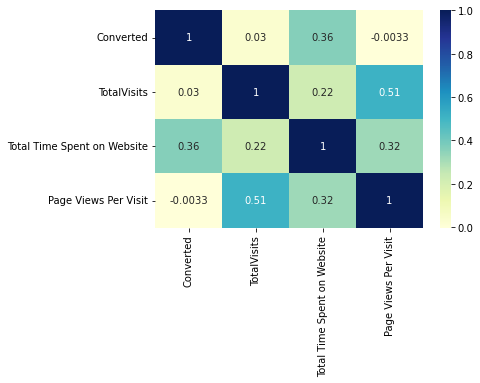

In [378]:
sns.heatmap(df1, annot = True, cmap = 'YlGnBu')

**We can see that `converted` has slightly higher correlation with `Total Time Spent on website`**

In [379]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


#### Univariate Analysis of numerical columns

<AxesSubplot:ylabel='TotalVisits'>

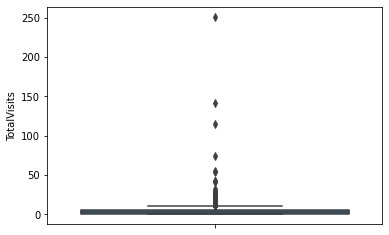

In [380]:
sns.boxplot(y=df['TotalVisits'])

**There are lot of outliers here**

<AxesSubplot:ylabel='TotalVisits'>

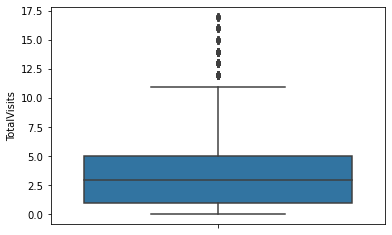

In [381]:
test_quantile = df['TotalVisits'].quantile(0.99)
df = df[(df.TotalVisits <= test_quantile)]
sns.boxplot(y=df['TotalVisits'])

<AxesSubplot:ylabel='Total Time Spent on Website'>

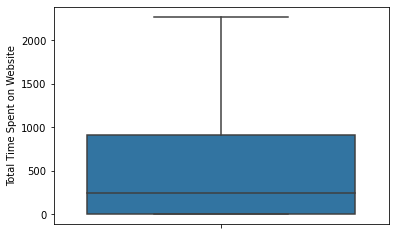

In [382]:
sns.boxplot(y=df['Total Time Spent on Website'])

**No outliers noted here**

<AxesSubplot:ylabel='Page Views Per Visit'>

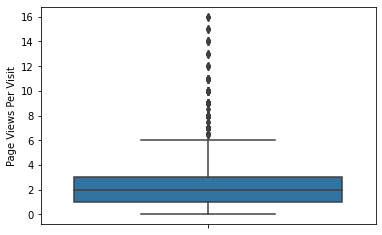

In [383]:
sns.boxplot(y=df['Page Views Per Visit'])

**There are lot of outliers here**

<AxesSubplot:ylabel='Page Views Per Visit'>

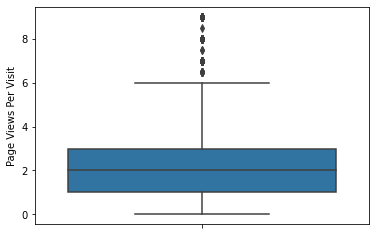

In [384]:
test_quantile = df['Page Views Per Visit'].quantile(0.99)
df = df[(df['Page Views Per Visit'] <= test_quantile)]
sns.boxplot(y=df['Page Views Per Visit'])

#### Bivariate analysis with target column

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

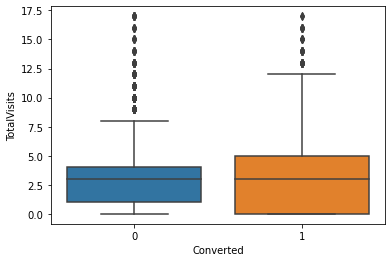

In [385]:
#TotalVisits vs Converted

sns.boxplot(data=df, x='Converted', y='TotalVisits')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

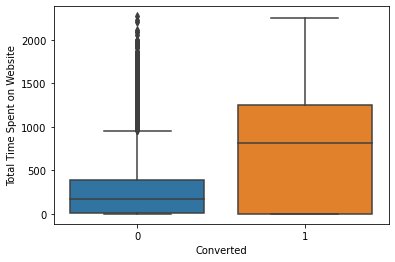

In [386]:
#Total Time Spent On Website vs Converted

sns.boxplot(data=df, x='Converted', y='Total Time Spent on Website')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

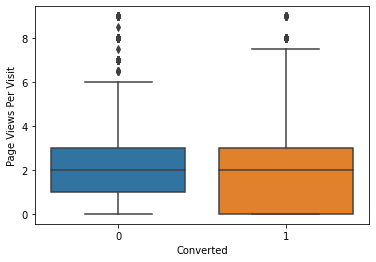

In [387]:
#Page Views Per Visit vs Converted

sns.boxplot(data=df, x='Converted', y='Page Views Per Visit')

#### Categorical fetaures EDA

In [388]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified


In [389]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5410
NaN                     2643
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [390]:
#replacing NaN with 'Unemployed' since unemployed people are reluctant to share occupation and unemployed 
#category dominates in the data

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

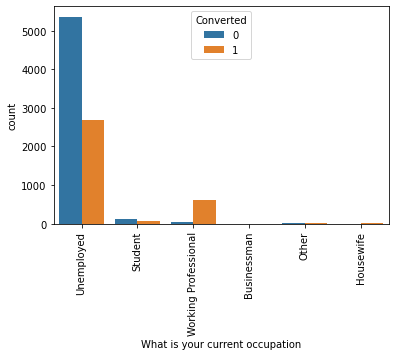

In [391]:
fig = sns.countplot(df['What is your current occupation'], hue = df.Converted)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show()

In [392]:
unwated_columns=['X Education Forums','Search','Do Not Call','Newspaper','Newspaper Article','Country',
                 'Do Not Email', 'What matters most to you in choosing a course', 'Magazine','Digital Advertisement',
                'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                'Get updates on DM Content', 'I agree to pay the amount through cheque']

df=df.drop(unwated_columns,1)

In [393]:
df.shape

(8953, 15)

In [394]:
#Handling null values in categorical columns

In [395]:
df['Lead Source'].value_counts(dropna=False)

Google               2836
Direct Traffic       2499
Olark Chat           1751
Organic Search       1092
Reference             442
Welingak Website      129
Referral Sites        117
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Press_Release           1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [396]:
#we will replace null and all low values with others

df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'others')     
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'others')

In [397]:
# we also see 'Google' and 'google' are nothing but same
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Converted                               8953 non-null   int64  
 3   TotalVisits                             8953 non-null   float64
 4   Total Time Spent on Website             8953 non-null   int64  
 5   Page Views Per Visit                    8953 non-null   float64
 6   Last Activity                           8953 non-null   object 
 7   Specialization                          5669 non-null   object 
 8   How did you hear about X Education      1958 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    5669 non-null   obje

In [399]:
df['Specialization'].value_counts(dropna=False)

NaN                                  3284
Finance Management                    945
Human Resource Management             820
Marketing Management                  815
Operations Management                 495
Business Administration               390
IT Projects Management                360
Supply Chain Management               338
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
Healthcare Management                 151
E-COMMERCE                            107
Hospitality Management                107
Retail Management                      95
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [400]:
df.Specialization = df.Specialization.replace(np.nan, 'Not specified')

In [401]:
df.Specialization = df.Specialization.replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_studies')

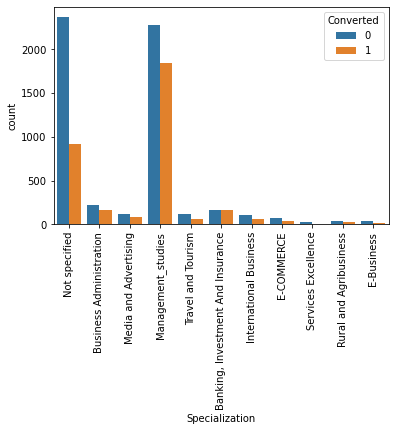

In [402]:
fig = sns.countplot(df['Specialization'], hue = df.Converted)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show()

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Converted                               8953 non-null   int64  
 3   TotalVisits                             8953 non-null   float64
 4   Total Time Spent on Website             8953 non-null   int64  
 5   Page Views Per Visit                    8953 non-null   float64
 6   Last Activity                           8953 non-null   object 
 7   Specialization                          8953 non-null   object 
 8   How did you hear about X Education      1958 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    5669 non-null   obje

In [404]:
df['How did you hear about X Education'].value_counts(dropna=False)

NaN                      6995
Online Search             792
Word Of Mouth             344
Student of SomeSchool     308
Other                     181
Multiple Sources          152
Advertisements             67
Social Media               65
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [405]:
df.drop('How did you hear about X Education', axis=1, inplace=True)

In [406]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3284
Will revert after reading the email                  2002
Ringing                                              1162
Interested in other courses                           505
Already a student                                     461
Closed by Horizzon                                    290
switched off                                          237
Busy                                                  183
Lost to EINS                                          169
Not doing further education                           137
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         81
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    26
in touch with 

In [407]:
df.Tags = df.Tags.replace(np.nan, 'Not specified')

df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'Others')


In [408]:
df['Lead Profile'].value_counts(dropna=False)

NaN                            6670
Potential Lead                 1532
Other Leads                     473
Student of SomeSchool           239
Dual Specialization Student      20
Lateral Student                  19
Name: Lead Profile, dtype: int64

In [409]:
df.drop('Lead Profile', axis=1, inplace=True)

In [410]:
df['City'].value_counts(dropna=False)

NaN                            3578
Mumbai                         3109
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

In [411]:
df.City = df.Tags.replace(np.nan, 'Mumbai')

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Converted                               8953 non-null   int64  
 3   TotalVisits                             8953 non-null   float64
 4   Total Time Spent on Website             8953 non-null   int64  
 5   Page Views Per Visit                    8953 non-null   float64
 6   Last Activity                           8953 non-null   object 
 7   Specialization                          8953 non-null   object 
 8   What is your current occupation         8953 non-null   object 
 9   Tags                                    8953 non-null   object 
 10  City                                    8953 non-null   obje

In [413]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3390
SMS Sent                        2700
Olark Chat Conversation          966
Page Visited on Website          594
Converted to Lead                428
Email Bounced                    310
Email Link Clicked               264
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      60
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [414]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 
                                                   'Approached upfront','View in browser link Clicked',       
                                                'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'others')

In [415]:
df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3224
Email Opened                    2789
SMS Sent                        2143
Page Visited on Website          288
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      46
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [416]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                         'Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront','Form Submitted on Website', 
                                                                       'Email Received'],'Others')

### Creating Dummy variables

In [417]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed,Interested in other courses,Interested in other courses,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not specified,Unemployed,Ringing,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,others,Media and Advertising,Unemployed,Ringing,Ringing,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed,Will revert after reading the email,Will revert after reading the email,No,Modified


In [418]:
# Dummy variables is meant for categorical variables only


In [419]:
# mapping yes, no to 1, 0

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

In [420]:
df['A free copy of Mastering The Interview'] = binary_map(df['A free copy of Mastering The Interview'])

In [421]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not specified'], 1)
df = pd.concat([df, dummy], axis = 1)

dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_others'], 1)
df = pd.concat([df, dummy], axis = 1)

dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_others'], 1)
df = pd.concat([df, dummy], axis = 1)

dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not specified'], 1)
df = pd.concat([df, dummy], axis = 1)

dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [422]:
df["Tags"].value_counts()

Not specified                          3284
Will revert after reading the email    2002
Others                                 1358
Ringing                                1162
Interested in other courses             505
Closed by Horizzon                      290
Busy                                    183
Lost to EINS                            169
Name: Tags, dtype: int64

In [423]:
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

df = pd.concat([df,dummy],1)

In [424]:
df.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      axis=1, inplace=True)

### Train test split

In [425]:
y= df['Converted']
X= df.drop('Converted', axis = 1) #all but target variiable is our training parameters

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=75)

### Feature scaling

In [427]:
scaler = StandardScaler()

In [428]:
my_list=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[my_list] = scaler.fit_transform(X_train[my_list])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_studies,Specialization_Media and Advertising,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Closed by Horizzon,City_Interested in other courses,City_Lost to EINS,City_Not specified,City_Others,City_Ringing,City_Will revert after reading the email
2212,-0.401459,1.124902,-0.152765,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7041,-1.084862,-0.884555,-1.204359,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8214,-1.084862,-0.884555,-1.204359,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4979,0.281943,0.689733,0.898828,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1790,-0.059758,-0.425616,0.373031,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [429]:
logreg = LogisticRegression()

In [430]:
rfe = RFE(logreg, 16)
rfe = rfe.fit(X_train,y_train)
rfe.support_
columns = X_train.columns[rfe.support_]
columns

Index(['Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Lead Origin_Lead Add Form',
       'City_Closed by Horizzon', 'City_Interested in other courses',
       'City_Lost to EINS', 'City_Others', 'City_Ringing',
       'City_Will revert after reading the email'],
      dtype='object')

In [431]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 29),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 32),
 ('Specialization_Business Administration', False, 43),
 ('Specialization_E-Business', False, 40),
 ('Specialization_E-COMMERCE', False, 25),
 ('Specialization_International Business', False, 11),
 ('Specialization_Management_studies', False, 36),
 ('Specialization_Media and Advertising', False, 39),
 ('Specialization_Rural and Agribusiness', False, 22),
 ('Specialization_Services Excellence', False, 16),
 ('Specialization_Travel and Tourism', False, 19),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', False, 37),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Social Media', False, 38)

In [432]:
# Model number 1

X_train_sm = sm.add_constant(X_train[columns])
logr1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logr1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.0
Date:                Tue, 22 Nov 2022   Deviance:                       2830.0
Time:                        19:27:47   Pearson chi2:                 7.24e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3283      0.074    -17.961      0.000      -1.473      -1.183
Lead Source_Welingak Website                 3.7874      1.067      3.550      0.000       1.697       5.878
Last Activity_Email Bounced                 -1.6342      0.528     -3.096      0.002      -2.669      -0.600
Last Activity_SMS Sent                       1.8326      0.108     17.007      0.000       1.621       2.044
Tags_Closed by Horizzon                   2.252e+15   2.42e+06   9.32e+08      0.000    2.25e+15    2.25e+15
Tags_Lost to EINS                         3.187e+06      0.270   1.18e+07      0.000    3.19e+06    3.19e+06
Tags_Others                              -9.579e+05      0.100  -9.58e+06      0.000   -9.58e+05   -9.58e+05
Tags_Ringing                              5.061e+04      0.138   3.67e+05      0.000    5.06e+04    5.06e+04
Tags_Will revert after reading the email   2.07e+06      0.096   2.16e+07      0.000    2.07e+06    2.07e+06
Last Notable Activity_Modified              -0.9665      0.124     -7.800      0.000      -1.209      -0.724
Lead Origin_Lead Add Form                    0.8613      0.446      1.932      0.053      -0.013       1.735
City_Closed by Horizzon                   2.252e+15   2.42e+06   9.32e+08      0.000    2.25e+15    2.25e+15
City_Interested in other courses            -1.7254      0.377     -4.573      0.000      -2.465      -0.986
City_Lost to EINS                        -3.187e+06      0.270  -1.18e+07      0.000   -3.19e+06   -3.19e+06
City_Others                               9.579e+05      0.100   9.58e+06      0.000    9.58e+05    9.58e+05
City_Ringing                             -5.061e+04      0.138  -3.67e+05      0.000   -5.06e+04   -5.06e+04
City_Will revert after reading the email  -2.07e+06      0.096  -2.16e+07      0.000   -2.07e+06   -2.07e+06
============================================================================================================
"""

**p-values are all verified. Checking the VIF now**

In [433]:
vif=pd.DataFrame()
vif['Cols'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values,i) for i in range(X_train[columns].shape[1])]
vif

,Cols,VIF
0,Lead Source_Welingak Website,1.320610e+00
1,Last Activity_Email Bounced,1.088015e+00
2,Last Activity_SMS Sent,8.169914e-02
3,Tags_Closed by Horizzon,2.339620e+09
4,Tags_Lost to EINS,1.429496e+09
5,Tags_Others,2.501900e+07
6,Tags_Ringing,inf
7,Tags_Will revert after reading the email,inf
8,Last Notable Activity_Modified,1.318245e-01
9,Lead Origin_Lead Add Form,6.184424e-01


In [434]:
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Cols,VIF
6,Tags_Ringing,inf
7,Tags_Will revert after reading the email,inf
10,City_Closed by Horizzon,inf
12,City_Lost to EINS,inf
13,City_Others,inf
14,City_Ringing,inf
15,City_Will revert after reading the email,inf
3,Tags_Closed by Horizzon,2.339620e+09
4,Tags_Lost to EINS,1.429496e+09
5,Tags_Others,2.501900e+07


In [435]:
columns = columns.drop(['Tags_Ringing'], 1)

In [436]:
# Model number 2

X_train_sm = sm.add_constant(X_train[columns])
logr3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 22 Nov 2022   Deviance:                       60512.
Time:                        19:27:47   Pearson chi2:                 2.96e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -4.362e+14   1.69e+06  -2.58e+08      0.000   -4.36e+14   -4.36e+14
Lead Source_Welingak Website              1.519e+15   8.03e+06   1.89e+08      0.000    1.52e+15    1.52e+15
Last Activity_Email Bounced              -1.401e+14    4.7e+06  -2.98e+07      0.000    -1.4e+14    -1.4e+14
Last Activity_SMS Sent                     1.98e+14   1.97e+06      1e+08      0.000    1.98e+14    1.98e+14
Tags_Closed by Horizzon                   5.601e+14   2.65e+06   2.11e+08      0.000     5.6e+14     5.6e+14
Tags_Lost to EINS                         5.889e+14   3.13e+06   1.88e+08      0.000    5.89e+14    5.89e+14
Tags_Others                              -1.776e+14    1.3e+06  -1.37e+08      0.000   -1.78e+14   -1.78e+14
Tags_Will revert after reading the email   5.26e+14    1.2e+06   4.37e+08      0.000    5.26e+14    5.26e+14
Last Notable Activity_Modified           -5.505e+14   1.91e+06  -2.88e+08      0.000   -5.51e+14   -5.51e+14
Lead Origin_Lead Add Form                 4.608e+14   4.12e+06   1.12e+08      0.000    4.61e+14    4.61e+14
City_Closed by Horizzon                   5.601e+14   2.65e+06   2.11e+08      0.000     5.6e+14     5.6e+14
City_Interested in other courses          2.936e+13    3.9e+06   7.53e+06      0.000    2.94e+13    2.94e+13
City_Lost to EINS                         5.889e+14   3.13e+06   1.88e+08      0.000    5.89e+14    5.89e+14
City_Others                              -1.776e+14    1.3e+06  -1.37e+08      0.000   -1.78e+14   -1.78e+14
City_Ringing                             -4.129e+14   2.76e+06   -1.5e+08      0.000   -4.13e+14   -4.13e+14
City_Will revert after reading the email   5.26e+14    1.2e+06   4.37e+08      0.000    5.26e+14    5.26e+14
============================================================================================================
"""

In [437]:
vif=pd.DataFrame()
vif['Cols'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values,i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Cols,VIF
3,Tags_Closed by Horizzon,inf
5,Tags_Others,inf
6,Tags_Will revert after reading the email,inf
9,City_Closed by Horizzon,inf
11,City_Lost to EINS,inf
12,City_Others,inf
14,City_Will revert after reading the email,inf
4,Tags_Lost to EINS,9.928687e+08
0,Lead Source_Welingak Website,1.320000e+00
1,Last Activity_Email Bounced,1.090000e+00


In [438]:
# Mdel number 3

columns = columns.drop(['Tags_Closed by Horizzon'], 1)

X_train_sm = sm.add_constant(X_train[columns])
logr3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 22 Nov 2022   Deviance:                       43657.
Time:                        19:27:47   Pearson chi2:                 2.13e+18
No. Iterations:                    36                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -1.059e+14   1.69e+06  -6.27e+07      0.000   -1.06e+14   -1.06e+14
Lead Source_Welingak Website               1.74e+15   8.03e+06   2.17e+08      0.000    1.74e+15    1.74e+15
Last Activity_Email Bounced              -1.356e+15    4.7e+06  -2.89e+08      0.000   -1.36e+15   -1.36e+15
Last Activity_SMS Sent                    2.839e+14   1.97e+06   1.44e+08      0.000    2.84e+14    2.84e+14
Tags_Lost to EINS                         2.245e+15   3.13e+06   7.16e+08      0.000    2.25e+15    2.25e+15
Tags_Others                                -1.6e+15    1.3e+06  -1.23e+09      0.000    -1.6e+15    -1.6e+15
Tags_Will revert after reading the email   2.02e+15    1.2e+06   1.68e+09      0.000    2.02e+15    2.02e+15
Last Notable Activity_Modified           -1.308e+15   1.91e+06  -6.83e+08      0.000   -1.31e+15   -1.31e+15
Lead Origin_Lead Add Form                 3.291e+14   4.12e+06   7.99e+07      0.000    3.29e+14    3.29e+14
City_Closed by Horizzon                   4.766e+15    5.3e+06   8.99e+08      0.000    4.77e+15    4.77e+15
City_Interested in other courses         -1.097e+13    3.9e+06  -2.81e+06      0.000    -1.1e+13    -1.1e+13
City_Lost to EINS                         2.245e+15   3.13e+06   7.16e+08      0.000    2.25e+15    2.25e+15
City_Others                                -1.6e+15    1.3e+06  -1.23e+09      0.000    -1.6e+15    -1.6e+15
City_Ringing                             -2.224e+15   2.76e+06  -8.07e+08      0.000   -2.22e+15   -2.22e+15
City_Will revert after reading the email   2.02e+15    1.2e+06   1.68e+09      0.000    2.02e+15    2.02e+15
============================================================================================================
"""

In [439]:
vif=pd.DataFrame()
vif['Cols'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values,i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Cols,VIF
3,Tags_Lost to EINS,inf
4,Tags_Others,inf
5,Tags_Will revert after reading the email,inf
10,City_Lost to EINS,inf
11,City_Others,inf
13,City_Will revert after reading the email,inf
0,Lead Source_Welingak Website,1.32
8,City_Closed by Horizzon,1.16
1,Last Activity_Email Bounced,1.09
7,Lead Origin_Lead Add Form,0.62


In [440]:
# Model number 4


columns = columns.drop(['Tags_Lost to EINS'], 1)

X_train_sm = sm.add_constant(X_train[columns])
logr3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 22 Nov 2022   Deviance:                       61065.
Time:                        19:27:47   Pearson chi2:                 2.99e+18
No. Iterations:                    34                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -6.726e+14   1.69e+06  -3.98e+08      0.000   -6.73e+14   -6.73e+14
Lead Source_Welingak Website              3.847e+15   8.03e+06   4.79e+08      0.000    3.85e+15    3.85e+15
Last Activity_Email Bounced              -6.529e+14    4.7e+06  -1.39e+08      0.000   -6.53e+14   -6.53e+14
Last Activity_SMS Sent                   -2.419e+14   1.97e+06  -1.23e+08      0.000   -2.42e+14   -2.42e+14
Tags_Others                               2.279e+14    1.3e+06   1.75e+08      0.000    2.28e+14    2.28e+14
Tags_Will revert after reading the email  1.308e+15    1.2e+06   1.09e+09      0.000    1.31e+15    1.31e+15
Last Notable Activity_Modified           -8.983e+14   1.91e+06  -4.69e+08      0.000   -8.98e+14   -8.98e+14
Lead Origin_Lead Add Form                 -1.58e+12   4.12e+06  -3.83e+05      0.000   -1.58e+12   -1.58e+12
City_Closed by Horizzon                   5.441e+15    5.3e+06   1.03e+09      0.000    5.44e+15    5.44e+15
City_Interested in other courses         -2.691e+15    3.9e+06   -6.9e+08      0.000   -2.69e+15   -2.69e+15
City_Lost to EINS                         5.347e+15   6.27e+06   8.53e+08      0.000    5.35e+15    5.35e+15
City_Others                               2.279e+14    1.3e+06   1.75e+08      0.000    2.28e+14    2.28e+14
City_Ringing                             -6.227e+14   2.76e+06  -2.26e+08      0.000   -6.23e+14   -6.23e+14
City_Will revert after reading the email  1.308e+15    1.2e+06   1.09e+09      0.000    1.31e+15    1.31e+15
============================================================================================================
"""

In [441]:
vif=pd.DataFrame()
vif['Cols'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values,i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Cols,VIF
3,Tags_Others,inf
10,City_Others,inf
12,City_Will revert after reading the email,inf
4,Tags_Will revert after reading the email,38740.21
0,Lead Source_Welingak Website,1.32
7,City_Closed by Horizzon,1.16
1,Last Activity_Email Bounced,1.09
9,City_Lost to EINS,1.04
6,Lead Origin_Lead Add Form,0.62
8,City_Interested in other courses,0.30


In [443]:
# Model number 5

columns = columns.drop(['Tags_Others'], 1)

X_train_sm = sm.add_constant(X_train[columns])
logr3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1386.4
Date:                Tue, 22 Nov 2022   Deviance:                       2772.8
Time:                        19:28:17   Pearson chi2:                 6.80e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3470      0.073    -18.486      0.000      -1.490      -1.204
Lead Source_Welingak Website                 4.1367      0.984      4.206      0.000       2.209       6.064
Last Activity_Email Bounced                 -1.8232      0.582     -3.133      0.002      -2.964      -0.683
Last Activity_SMS Sent                       2.0542      0.106     19.432      0.000       1.847       2.261
Tags_Will revert after reading the email -2.431e+05      0.091  -2.69e+06      0.000   -2.43e+05   -2.43e+05
Last Notable Activity_Modified              -1.6596      0.120    -13.873      0.000      -1.894      -1.425
Lead Origin_Lead Add Form                    0.5708      0.439      1.301      0.193      -0.289       1.431
City_Closed by Horizzon                   4.504e+15   4.83e+06   9.32e+08      0.000     4.5e+15     4.5e+15
City_Interested in other courses            -1.7160      0.324     -5.294      0.000      -2.351      -1.081
City_Lost to EINS                            5.7327      0.622      9.217      0.000       4.514       6.952
City_Others                                 -2.4127      0.204    -11.812      0.000      -2.813      -2.012
City_Ringing                                -3.2013      0.274    -11.686      0.000      -3.738      -2.664
City_Will revert after reading the email  2.431e+05      0.091   2.69e+06      0.000    2.43e+05    2.43e+05
============================================================================================================
"""

In [444]:
vif=pd.DataFrame()
vif['Cols'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values,i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Cols,VIF
3,Tags_Will revert after reading the email,inf
11,City_Will revert after reading the email,inf
0,Lead Source_Welingak Website,1.32
6,City_Closed by Horizzon,1.16
1,Last Activity_Email Bounced,1.09
8,City_Lost to EINS,1.04
5,Lead Origin_Lead Add Form,0.62
7,City_Interested in other courses,0.30
9,City_Others,0.21
4,Last Notable Activity_Modified,0.13


In [445]:
# Model number 6

columns = columns.drop(['Tags_Will revert after reading the email'], 1)

X_train_sm = sm.add_constant(X_train[columns])
logr3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1384.9
Date:                Tue, 22 Nov 2022   Deviance:                       2769.7
Time:                        19:29:06   Pearson chi2:                 7.48e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3506      0.074    -18.312      0.000      -1.495      -1.206
Lead Source_Welingak Website                 3.9399      1.115      3.534      0.000       1.755       6.125
Last Activity_Email Bounced                 -1.5541      0.545     -2.854      0.004      -2.622      -0.487
Last Activity_SMS Sent                       2.0809      0.106     19.554      0.000       1.872       2.289
Last Notable Activity_Modified              -1.6821      0.121    -13.851      0.000      -1.920      -1.444
Lead Origin_Lead Add Form                    0.9186      0.428      2.144      0.032       0.079       1.758
City_Closed by Horizzon                     27.5470   1.41e+04      0.002      0.998   -2.77e+04    2.78e+04
City_Interested in other courses            -1.7135      0.354     -4.835      0.000      -2.408      -1.019
City_Lost to EINS                            6.0532      0.600     10.097      0.000       4.878       7.228
City_Others                                 -2.3966      0.206    -11.637      0.000      -2.800      -1.993
City_Ringing                                -3.5407      0.251    -14.132      0.000      -4.032      -3.050
City_Will revert after reading the email     4.7780      0.183     26.109      0.000       4.419       5.137
============================================================================================================
"""

In [446]:
#dropping column with high p value

columns = columns.drop(['City_Closed by Horizzon'], 1)

In [447]:
X_train_sm = sm.add_constant(X_train[columns])
logr3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1639.1
Date:                Tue, 22 Nov 2022   Deviance:                       3278.2
Time:                        19:30:21   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0604      0.066    -16.034      0.000      -1.190      -0.931
Lead Source_Welingak Website                 1.9266      1.053      1.829      0.067      -0.138       3.991
Last Activity_Email Bounced                 -1.9853      0.514     -3.865      0.000      -2.992      -0.978
Last Activity_SMS Sent                       1.6887      0.097     17.366      0.000       1.498       1.879
Last Notable Activity_Modified              -1.1424      0.100    -11.444      0.000      -1.338      -0.947
Lead Origin_Lead Add Form                    3.2325      0.269     12.015      0.000       2.705       3.760
City_Interested in other courses            -2.2429      0.356     -6.306      0.000      -2.940      -1.546
City_Lost to EINS                            5.2977      0.594      8.926      0.000       4.134       6.461
City_Others                                 -2.5593      0.202    -12.648      0.000      -2.956      -2.163
City_Ringing                                -3.9355      0.272    -14.446      0.000      -4.469      -3.402
City_Will revert after reading the email     4.2539      0.173     24.600      0.000       3.915       4.593
============================================================================================================
"""

In [448]:
vif=pd.DataFrame()
vif['Cols'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values,i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Cols,VIF
0,Lead Source_Welingak Website,1.32
1,Last Activity_Email Bounced,1.09
6,City_Lost to EINS,1.04
4,Lead Origin_Lead Add Form,0.56
5,City_Interested in other courses,0.30
7,City_Others,0.21
3,Last Notable Activity_Modified,0.13
9,City_Will revert after reading the email,0.13
2,Last Activity_SMS Sent,0.08
8,City_Ringing,0.06


### All vif and p-values are under acceptable range

In [452]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [453]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.008476,2212
1,0,0.652116,7041
2,0,0.374256,8214
3,1,0.652116,4979
4,0,0.374256,1790


In [454]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.008476,2212,0
1,0,0.652116,7041,1
2,0,0.374256,8214,0
3,1,0.652116,4979,1
4,0,0.374256,1790,0
5,0,0.374256,1918,0
6,0,0.002154,4419,0
7,0,0.011594,653,0
8,0,0.035326,8863,0
9,0,0.257238,980,0


In [457]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3739,  157],
       [ 424, 1947]])

In [458]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9072921653103558

In [460]:
#True positives
TP = confusion[1,1]
#True negatives
TN = confusion[0,0]
#False positives
FP = confusion[0,1]
#False negatives
FN = confusion[1,0] 

#sensitivity check
TP / float(TP+FN)

0.8211725010544074

In [461]:
#specificity calculaion
TN / float(TN+FP)

0.9597022587268994

In [462]:
# ROC curve

In [463]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [464]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

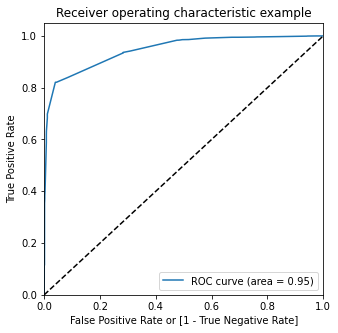

In [465]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [469]:
# Checking the accuracy on test data

In [471]:
#scaling test dataset

In [472]:
new_columns=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[new_columns] = scaler.fit_transform(X_test[new_columns])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_studies,Specialization_Media and Advertising,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Closed by Horizzon,City_Interested in other courses,City_Lost to EINS,City_Not specified,City_Others,City_Ringing,City_Will revert after reading the email
5115,-0.726401,-0.148212,-0.645126,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
5646,-1.077509,-0.862788,-1.177584,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1067,-1.077509,-0.862788,-1.177584,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
6068,2.082470,-0.447813,3.614536,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3462,0.326926,-0.081220,0.952247,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [473]:
X_test = X_test[columns]
X_test.head()

,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Notable Activity_Modified,Lead Origin_Lead Add Form,City_Interested in other courses,City_Lost to EINS,City_Others,City_Ringing,City_Will revert after reading the email
5115,0,0,0,1,0,0,0,1,0,0
5646,0,0,0,0,1,0,0,0,0,0
1067,0,0,0,0,0,0,0,0,0,1
6068,0,0,0,1,0,0,0,1,0,0
3462,0,0,1,0,0,0,0,0,0,1


In [474]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [475]:
y_test_pred

5115    0.008476
5646    0.897720
1067    0.960591
6068    0.008476
3462    0.992477
          ...   
1341    0.960591
9064    0.099506
532     0.008476
6959    0.035326
6326    0.257238
Length: 2686, dtype: float64

In [476]:
y_predict = pd.DataFrame(y_test_pred)

In [477]:
y_predict.head()

,0
5115,0.008476
5646,0.897720
1067,0.960591
6068,0.008476
3462,0.992477


In [479]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index
y_predict.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_predict],axis=1)

In [480]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5115,0.008476
1,1,5646,0.897720
2,1,1067,0.960591
3,0,6068,0.008476
4,1,3462,0.992477


In [482]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'probability'})

y_pred_final = y_pred_final[['Prospect ID','Converted','probability']]
y_pred_final['Lead_Score'] = y_pred_final.probability.map( lambda x: round(x*100))

In [483]:
y_pred_final.head()

,Prospect ID,Converted,probability,Lead_Score
0,5115,0,0.008476,1
1,5646,1,0.897720,90
2,1067,1,0.960591,96
3,6068,0,0.008476,1
4,3462,1,0.992477,99


In [486]:
y_pred_final['predicted'] = y_pred_final.probability.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,probability,Lead_Score,predicted
0,5115,0,0.008476,1,0
1,5646,1,0.897720,90,1
2,1067,1,0.960591,96,1
3,6068,0,0.008476,1,0
4,3462,1,0.992477,99,1


In [488]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.8894266567386448

In [489]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion2

array([[1541,  121],
       [ 176,  848]])

In [492]:
#true positive 
TP = confusion2[1,1]
#true negatives
TN = confusion2[0,0]
#false positives
FP = confusion2[0,1]
#false negatives
FN = confusion2[1,0] 
#sensitivity of model 
print('sensitivity: ', TP / float(TP+FN))

#specificity
print('specificity:', TN / float(TN+FP))


sensitivity:  0.828125
specificity: 0.9271961492178099


In [498]:
precision_score(y_pred_final.Converted , y_pred_final.predicted)

0.8751289989680082

In [499]:
recall_score(y_pred_final.Converted , y_pred_final.predicted)

0.828125

## Observation

Training Data:
- Accuracy: 90.72%, Sensitivity: 82.11%, Specificity: 95.97%

Testing Data: 
- Accuracy: 88.94%, Sensitivity: 82.81%, Specificity: 92.71%